# 📒 Notebook: Análisis de Sentimientos con PySentimiento

## 1. Introducción

Explicación breve de qué es análisis de sentimientos.

Ejemplo de casos de uso (redes sociales, reseñas de productos, feedback de usuarios).

## 2. Preparación del entorno

In [40]:
%pip install pysentimiento==0.7.3 transformers torch


  Using cached pysentimiento-0.7.3-py3-none-any.whl.metadata (7.7 kB)
  Using cached accelerate-1.10.1-py3-none-any.whl.metadata (19 kB)
  Using cached datasets-4.0.0-py3-none-any.whl.metadata (19 kB)
  Using cached emoji-2.14.1-py3-none-any.whl.metadata (5.7 kB)
  Using cached spacy-3.8.7-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached huggingface_hub-0.34.4-py3-none-any.whl.metadata (14 kB)
  Using cached PyYAML-6.0.2-cp312-cp312-win_amd64.whl.metadata (2.1 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached tokenizers-0.22.0-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.6.2-cp38-abi3-win_amd64.whl.metadata (4.1 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached pyarrow-21.0.0-cp312-cp312-win_amd64.whl.metadata (3.4 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached pandas-2.3.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached xxhash-3.5.0-cp312-cp312-


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## 3. Cargar el analizador preentrenado

In [42]:
from pysentimiento import create_analyzer

analyzer = create_analyzer(task="sentiment", lang="es")
MAPEO = {"POS": "Feliz", "NEG": "Negativo", "NEU": "Neutral"}

## 4. Función auxiliar

In [43]:
def analizar_sentimiento(texto: str) -> str:
    resultado = analyzer.predict(texto)
    return MAPEO.get(resultado.output, "Neutral")

## 5. Ejemplos de uso

Probar con frases cortas:

In [44]:
ejemplos = [
    "Qué día tan maravilloso, estoy feliz",
    "Esto es lo peor que me ha pasado",
    "Hoy es un día normal, nada especial"
]

for texto in ejemplos:
    print(f"Texto: {texto}")
    print(f"Sentimiento: {analizar_sentimiento(texto)}\n")


Texto: Qué día tan maravilloso, estoy feliz
Sentimiento: Feliz

Texto: Esto es lo peor que me ha pasado
Sentimiento: Negativo

Texto: Hoy es un día normal, nada especial
Sentimiento: Feliz



## 6. Visualización con gráficas

Crear una lista de frases y graficar cuántas resultan Feliz, Negativo, Neutral.

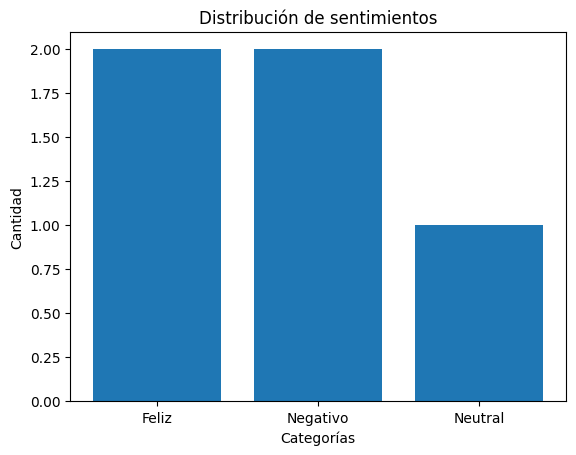

In [45]:
import matplotlib.pyplot as plt

textos = [
    "Me encanta este producto, funciona genial",
    "No me gustó la atención al cliente",
    "Está bien, aunque podría mejorar",
    "Hoy estoy muy feliz",
    "Odio cuando las cosas salen mal"
]

resultados = [analizar_sentimiento(t) for t in textos]

# Conteo
from collections import Counter
conteo = Counter(resultados)

plt.bar(conteo.keys(), conteo.values())
plt.title("Distribución de sentimientos")
plt.xlabel("Categorías")
plt.ylabel("Cantidad")
plt.show()


## 7. Conclusiones

- El modelo ya está preentrenado y puede detectar emociones básicas en español.
- Es útil para clasificar comentarios de usuarios sin necesidad de entrenar desde cero.
- Se pueden ampliar las categorías si el proyecto lo requiere.